In [116]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy
import IPython.display as ipd
from PIL import Image
import cv2

## Convolution?

In [44]:
def show_stem(x, length=20, title=None):
    x = np.pad(x, (0, length-len(x)))
    plt.figure(figsize=[10, 2])
    plt.stem(np.array([i for i in range(len(x))]), x)
    plt.grid()
    if title:
        plt.title(title)
    plt.show()
    
def show_wav(x, length=16000*5, title=None):
    x = np.pad(x, (0, length-len(x)))
    plt.figure(figsize=[18, 2])
    plt.plot(x)
    plt.grid()
    if title:
        plt.title(title)
    plt.show()

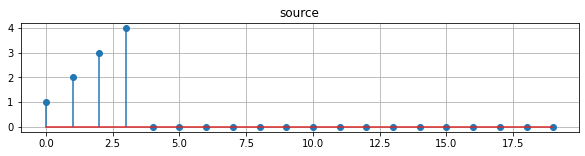

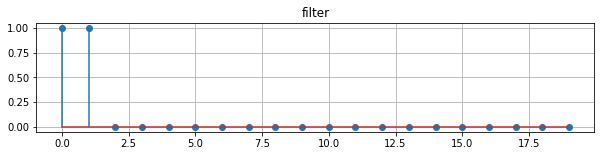

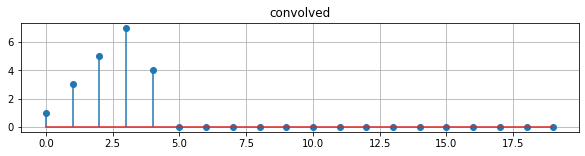

In [45]:
source = np.array([1, 2, 3, 4])
filter = np.array([1, 1])
convolved = np.convolve(source, filter)

show_stem(source, title='source')
show_stem(filter, title='filter')
show_stem(convolved, title='convolved')

## Audio

Audio sample from KAIST Audio Book Dataset https://aihub.or.kr

Reverb impulse respose from https://www.voxengo.com/impulses/


#### Source

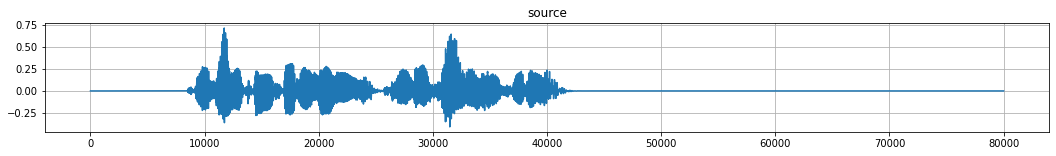

In [55]:
source, _ = librosa.load('1.wav', sr=16000)
show_wav(source, title='source')
ipd.Audio(source, rate=16000)

#### Filter

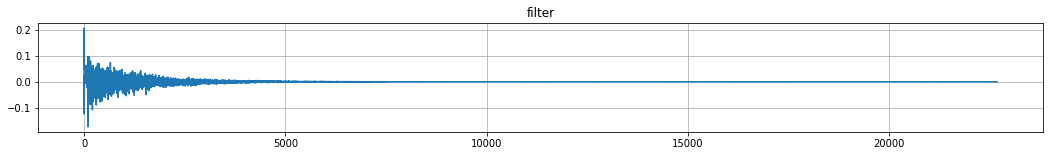

In [56]:
filter, _ = librosa.load('Block Inside.wav', sr=16000)
show_wav(filter, length=len(filter), title='filter')
ipd.Audio(filter, rate=16000)

### Reverb

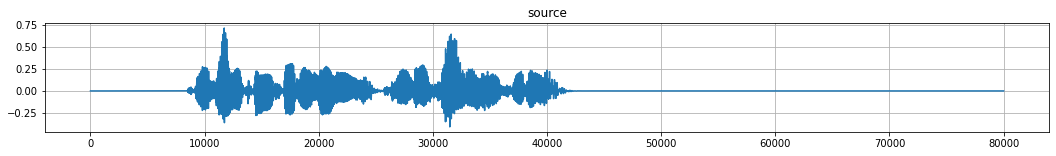

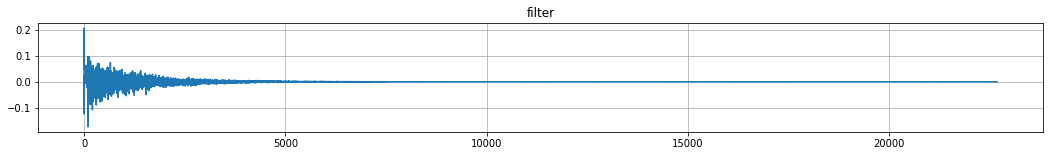

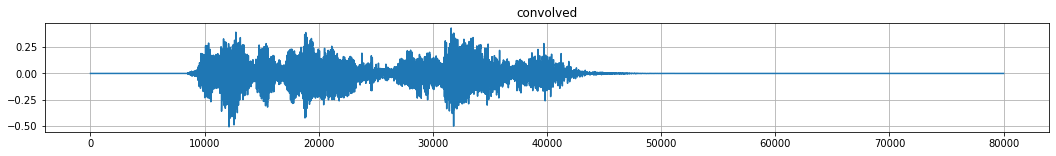

In [46]:
source, _ = librosa.load('1.wav', sr=16000)
filter, _ = librosa.load('Block Inside.wav', sr=16000)
convolved = np.convolve(source, filter)

show_wav(source, title='source')
show_wav(filter, length=len(filter), title='filter')
show_wav(convolved, title='convolved')

ipd.Audio(convolved, rate=16000)

### LowPass

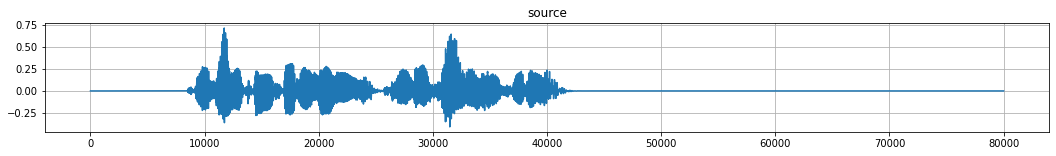

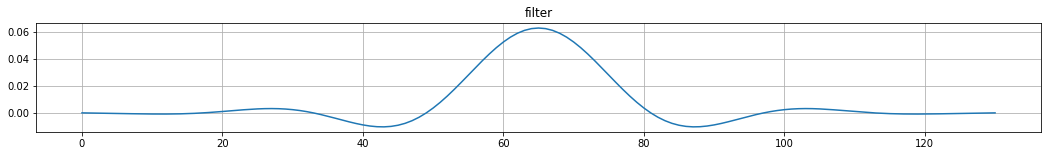

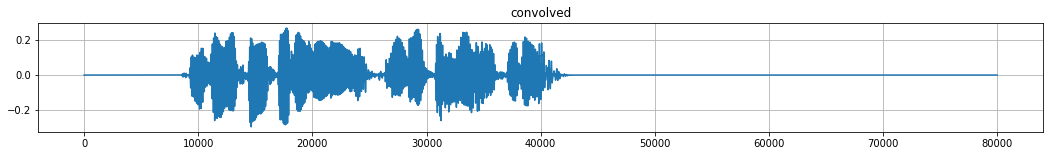

In [53]:
source, _ = librosa.load('1.wav', sr=16000)
filter = scipy.signal.firwin(131, 500, fs=16000)
convolved = np.convolve(source, filter)

show_wav(source, title='source')
show_wav(filter, length=len(filter), title='filter')
show_wav(convolved, title='convolved')

ipd.Audio(convolved, rate=16000)

### HighPass

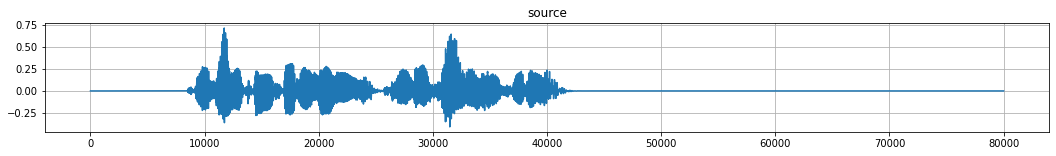

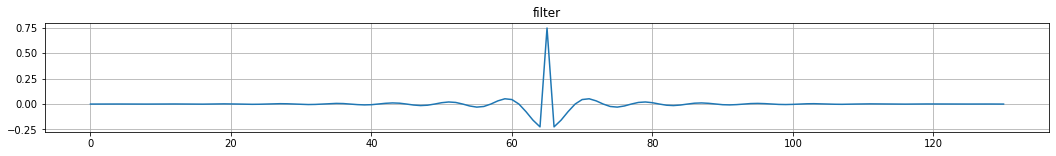

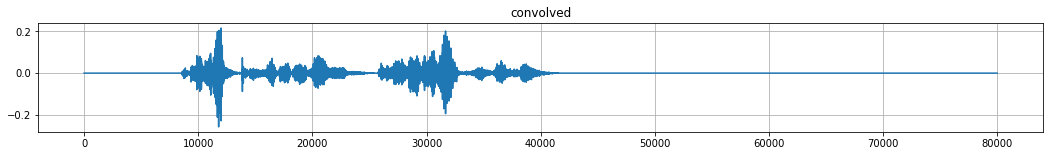

In [52]:
source, _ = librosa.load('1.wav', sr=16000)
filter = scipy.signal.firwin(131, 2000, pass_zero='highpass', fs=16000)
convolved = np.convolve(source, filter)

show_wav(source, title='source')
show_wav(filter, length=len(filter), title='filter')
show_wav(convolved, title='convolved')

ipd.Audio(convolved, rate=16000)

## Image

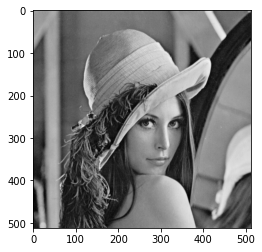

In [124]:
source = np.array(Image.open('lenna.png').convert('L')) / 256
plt.figure(figsize=[4, 4])
plt.imshow(source, cmap='gray')
plt.show()

### Gaussian Blur
https://en.wikipedia.org/wiki/Kernel_(image_processing)

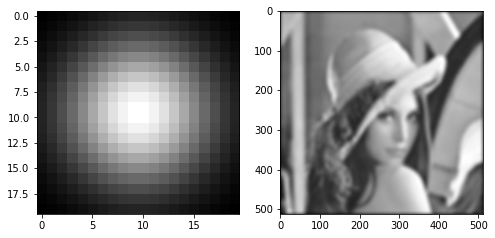

In [128]:
a = np.arange(100, step=1).reshape((10, 10))
filter = cv2.getGaussianKernel(20, 5)
filter = np.outer(filter, filter.transpose())
convolved = scipy.signal.convolve2d(source, filter, mode='same')

plt.figure(figsize=[8, 4])
plt.subplot(1, 2, 1)
plt.imshow(filter, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(convolved, cmap='gray')
plt.show()

### Edge Detection (Sobel operator)
https://en.wikipedia.org/wiki/Sobel_operator

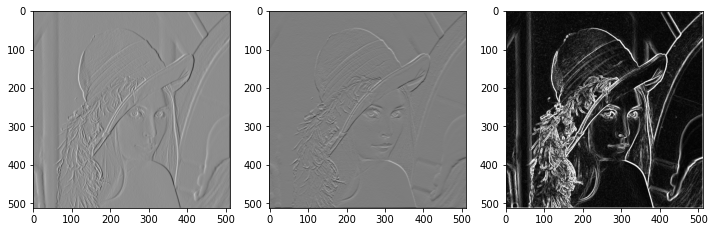

In [125]:
filter1 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
convolved1 = scipy.signal.convolve2d(source, filter1, mode='same')
filter2 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
convolved2 = scipy.signal.convolve2d(source, filter2, mode='same')
edge = np.sqrt(convolved1**2 + convolved2**2)

plt.figure(figsize=[12, 4])
plt.subplot(1, 3, 1)
plt.imshow(convolved1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(convolved2, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(np.clip(edge, a_min=0, a_max=1), cmap='gray')
plt.show()